In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# 1. Generate some dummy linear data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

In [32]:
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


In [33]:
# Add bias term (column of 1s)
# Adds 1 as a bias and the second one is X
X_b = np.c_[np.ones((100, 1)), X]  # shape: (100, 2)

In [34]:
X[:5]

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728]])

In [35]:
print(X_b[:5])

[[1.         0.74908024]
 [1.         1.90142861]
 [1.         1.46398788]
 [1.         1.19731697]
 [1.         0.31203728]]


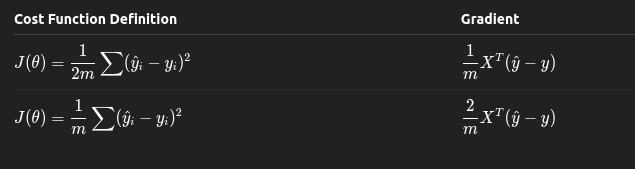\
where:
- m= lenght of input
- xT = x Transpose = transpose of X
- y pred = prediction of y
- y pred = input x thita
- y = actual y


## Gradient Descent (Batch)

In [141]:
# 2. Initialize parameters
theta = np.random.randn(2, 1)  # [bias, weight]
learning_rate = 0.1
n_iterations = 1000
m = len(X_b)  # number of samples

In [142]:
print(theta)

[[ 1.17345392]
 [-0.69293531]]


In [143]:
for _ in range(n_iterations):
    gradients = (2/m) * X_b.T @ (X_b @ theta - y)
    theta -= learning_rate * gradients

print("Learned theta (weights):")
print(theta)  # Should be close to [4, 3]

Learned theta (weights):
[[4.21509616]
 [2.77011339]]


In [144]:
X_line = np.array([[1, x] for x in np.linspace(0, 2, 100)])
y_pred = X_line @ theta
y_pred[:20]

array([[4.21509616],
       [4.27105804],
       [4.32701993],
       [4.38298182],
       [4.4389437 ],
       [4.49490559],
       [4.55086748],
       [4.60682936],
       [4.66279125],
       [4.71875314],
       [4.77471502],
       [4.83067691],
       [4.8866388 ],
       [4.94260068],
       [4.99856257],
       [5.05452446],
       [5.11048634],
       [5.16644823],
       [5.22241012],
       [5.278372  ]])

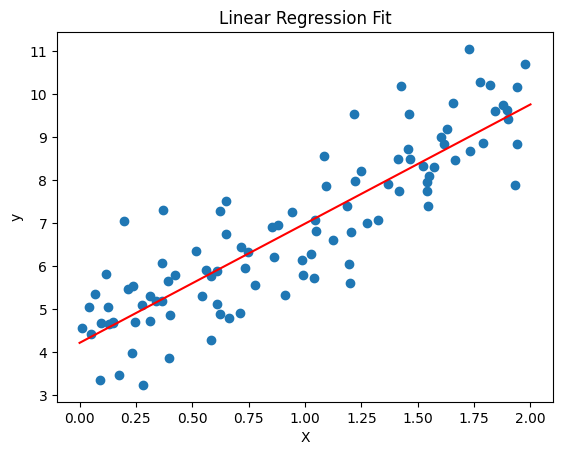

In [145]:
# 4. Plot the data and prediction
plt.scatter(X, y)
X_line = np.array([[1, x] for x in np.linspace(0, 2, 100)])
y_pred = X_line @ theta
plt.plot(np.linspace(0, 2, 100), y_pred, color='red')
plt.title("Linear Regression Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## Gradient Descent (Stochastic)

In [135]:
print(np.random.randint(100))

3


In [136]:
theta = np.random.randn(2, 1)  # [bias, weight]
learning_rate = 0.1
n_iterations = 1000
m = len(X_b)  # number of samples
print(theta)

[[ 0.21937669]
 [-1.21726172]]


In [137]:
for epoch in range(n_iterations):
    for i in range(m):  # m = len(X_b)
        rand_index = np.random.randint(m)
        xi = X_b[rand_index:rand_index+1]
        yi = y[rand_index:rand_index+1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        theta -= learning_rate * gradients

In [138]:
print(theta)

[[3.77893446]
 [3.28417655]]


In [139]:
X_line = np.array([[1, x] for x in np.linspace(0, 2, 100)])
y_pred = X_line @ theta
y_pred[:20]

array([[3.77893446],
       [3.84528146],
       [3.91162847],
       [3.97797547],
       [4.04432247],
       [4.11066947],
       [4.17701647],
       [4.24336347],
       [4.30971047],
       [4.37605747],
       [4.44240447],
       [4.50875147],
       [4.57509848],
       [4.64144548],
       [4.70779248],
       [4.77413948],
       [4.84048648],
       [4.90683348],
       [4.97318048],
       [5.03952748]])

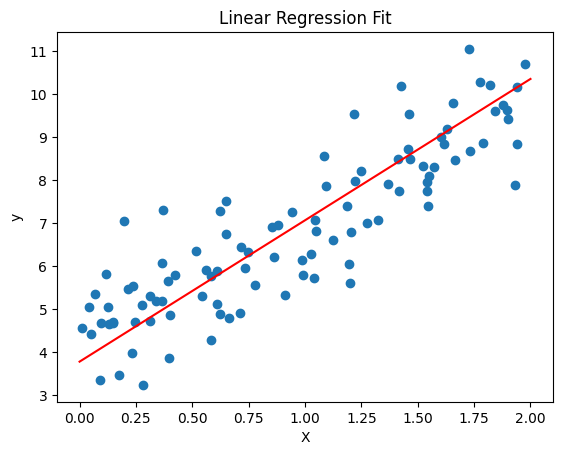

In [140]:
# 4. Plot the data and prediction
plt.scatter(X, y)
X_line = np.array([[1, x] for x in np.linspace(0, 2, 100)])
y_pred = X_line @ theta
plt.plot(np.linspace(0, 2, 100), y_pred, color='red')
plt.title("Linear Regression Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## Gradient Descent (MiniBatch)

In [146]:
theta = np.random.randn(2, 1)  # [bias, weight]
learning_rate = 0.1
n_iterations = 1000
m = len(X_b)  # number of samples
batch_size = 32
n_batches = int(np.ceil(m / batch_size))
print(theta)

[[-0.46517375]
 [ 2.22755979]]


In [147]:
np.random.permutation(m)

array([ 7, 56, 70, 57, 31, 86, 74, 50, 72, 26, 65, 42, 19, 94, 95, 78, 92,
       14, 85, 54, 10, 37, 87, 64, 16, 25, 80,  9, 30, 93,  2, 29, 98, 49,
       22,  4, 39, 43, 52, 76, 73, 34, 83, 13, 46, 96, 99, 41, 79, 67, 60,
        3, 20, 61,  5, 28, 53, 45, 27, 62, 51, 55,  8,  1, 58, 66, 48, 33,
       88, 90, 69,  0, 47, 82, 32, 89, 23, 40, 97, 11, 35, 17, 71, 63, 12,
       81, 91, 18, 38, 44, 24, 59, 77, 21, 15, 75, 84, 68,  6, 36])

In [148]:
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for i in range(0, m, batch_size):
        xi = X_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradients = (2 / len(xi)) * xi.T @ (xi @ theta - yi)
        theta -= learning_rate * gradients

In [149]:
print(theta)

[[4.22699723]
 [2.74486144]]


In [155]:
X_line = np.array([[1, x] for x in np.linspace(0, 2, 100)])
y_pred = X_line @ theta
y_pred[:20]

array([[4.22699723],
       [4.28244897],
       [4.33790072],
       [4.39335247],
       [4.44880421],
       [4.50425596],
       [4.55970771],
       [4.61515945],
       [4.6706112 ],
       [4.72606295],
       [4.78151469],
       [4.83696644],
       [4.89241818],
       [4.94786993],
       [5.00332168],
       [5.05877342],
       [5.11422517],
       [5.16967692],
       [5.22512866],
       [5.28058041]])

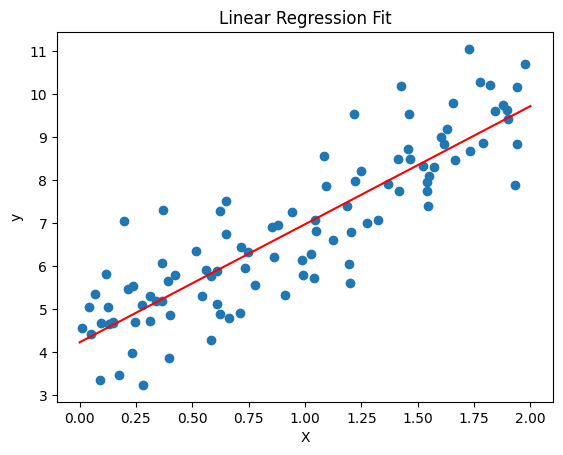

In [154]:
# 4. Plot the data and prediction
plt.scatter(X, y)
X_line = np.array([[1, x] for x in np.linspace(0, 2, 100)])
y_pred = X_line @ theta
plt.plot(np.linspace(0, 2, 100), y_pred, color='red')
plt.title("Linear Regression Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.show()